In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tqdm import tqdm_notebook as tqdm
import string

In [2]:
df = pd.read_csv("results.csv", error_bad_lines=False, encoding='Latin-1', warn_bad_lines=False);
df.head()

,synset_type,synset_id,image_id,image_url
0,n,2094258,3357,http://www.nzkc.org.nz/nds2006/images/2124.jpg
1,n,2094258,3362,http://www.calendarcastle.com/Modules/Includes...
2,n,2094258,3368,http://www.pedigree.com.sg/breeds/images/norwi...
3,n,2094258,3374,http://www.dogzonline.com.au/images/profiles/6...
4,n,2094258,3375,http://www.dogchannel.com/images/articles/bree...


In [3]:
df = df.drop(columns=["synset_type", "synset_id", "image_id"])
df.head()

,image_url
0,http://www.nzkc.org.nz/nds2006/images/2124.jpg
1,http://www.calendarcastle.com/Modules/Includes...
2,http://www.pedigree.com.sg/breeds/images/norwi...
3,http://www.dogzonline.com.au/images/profiles/6...
4,http://www.dogchannel.com/images/articles/bree...


In [4]:
urls = df["image_url"].values
del df
urls

array(['http://www.nzkc.org.nz/nds2006/images/2124.jpg',
       'http://www.calendarcastle.com/Modules/Includes/sendbinary.asp?path=C%!A(MISSING)%!C(MISSING)Inetpub%!C(MISSING)wwwroot%!C(MISSING)commercefactory%!C(MISSING)Modules%!C(MISSING)Assets%!C(MISSING)793%!C(MISSING)Catalog%!C(MISSING)product52498%!E(MISSING)jpg&Width=200',
       'http://www.pedigree.com.sg/breeds/images/norwich_terr_02.jpg',
       ...,
       'http://farm5.static.flickr.com/4002/4627361193_72e9374fc2.jpg',
       'http://farm4.static.flickr.com/3640/3568877328_605217c2ce.jpg',
       'http://farm4.static.flickr.com/3362/3645042384_0cde75dce9.jpg'],
      dtype=object)

In [5]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(urls[-3])
img = Image.open(BytesIO(response.content))

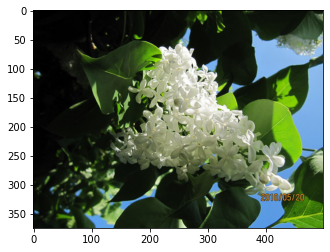

In [6]:
plt.imshow(np.asarray(img))

In [7]:
img.save("images/test.jpg")

In [8]:
img.save("images/"+str(0)+".jpg")


In [9]:
urls.shape

(14265468,)

In [10]:
import ray
ray.init()

2020-12-22 13:59:31,411	INFO services.py:1090 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '192.168.1.141',
 'raylet_ip_address': '192.168.1.141',
 'redis_address': '192.168.1.141:6379',
 'object_store_address': '/tmp/ray/session_2020-12-22_13-59-30_847482_18925/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-12-22_13-59-30_847482_18925/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/tmp/ray/session_2020-12-22_13-59-30_847482_18925',
 'metrics_export_port': 65417,
 'node_id': 'd2790c2d3fc3303e14c3db353433f21b60589826'}

In [ ]:
clean_urls = set()

counter = 0
@ray.remote
def process_image(url):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        clean_urls.add(url)
        name = url.translate(str.maketrans('', '', string.punctuation))
        img.save("images/"+name+".jpg")
        return
    except Exception as e:
        #print(e)
        return
    

<ipython-input-11-bd4406fe3a6f>:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  [process_image.remote(url) for url in tqdm(urls[:int(len(urls)/3)])]


<ipython-input-11-bd4406fe3a6f>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  [process_image.remote(url) for url in tqdm(urls[int(len(urls)/3):int(2*len(urls)/3)])]


In [ ]:
[process_image.remote(url) for url in tqdm(urls[:int(len(urls)/3)])]
    

In [ ]:
[process_image.remote(url) for url in tqdm(urls[int(len(urls)/3):int(2*len(urls)/3)])]


In [ ]:
[process_image.remote(url) for url in tqdm(urls[int(2*len(urls)/3):])]
